**Research Questions**

1. 

2. 

3. 

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [133]:
X = pd.read_csv("data/train/features.csv")
Y = pd.read_csv("data/train/labels.csv")

In [134]:
df = pd.concat([X,Y], axis=1)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,60739,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,27263,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,37057,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,31282,functional


# Duplicates

In [171]:
df[df.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group


# Outliers and bad data

<AxesSubplot: xlabel='amount_tsh', ylabel='Density'>

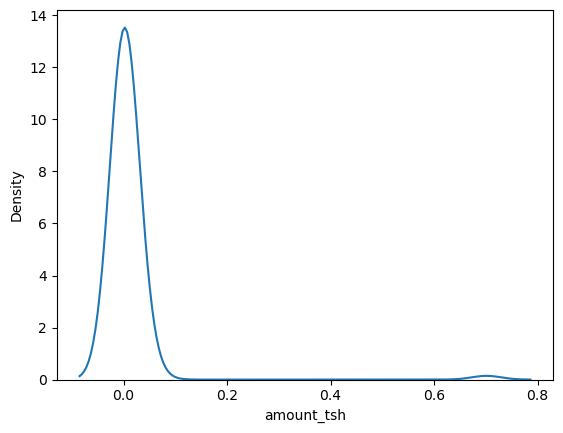

In [180]:

sns.kdeplot(data=df['amount_tsh'].value_counts(normalize=True))

<AxesSubplot: xlabel='year', ylabel='proportion'>

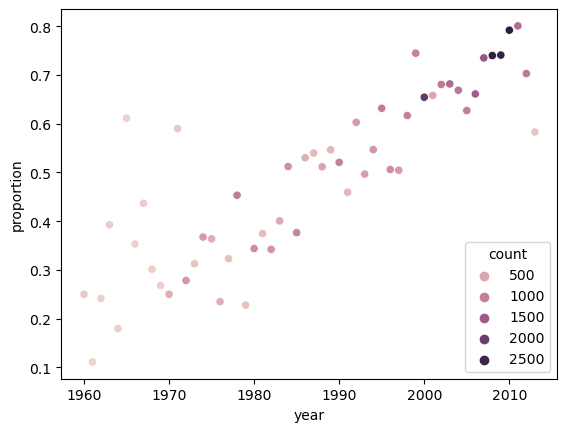

In [167]:

# Count rows with the same construction_year
construction_year_counts = pd.DataFrame(df['construction_year'].value_counts(), index=None)
construction_year_counts.columns = ['count']


# Show distribution of all classes in status_group column for each construction year
for year in construction_year_counts.index:
    construction_year_counts.loc[construction_year_counts.index == year, 'func_counts'] = len(df[(df['construction_year'] == year) & (df['status_group'] == 'functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'nonfunc_counts'] = len(df[(df['construction_year'] == year) & (df['status_group'] == 'non functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'proportion'] = construction_year_counts['func_counts']/(construction_year_counts['func_counts']+construction_year_counts['nonfunc_counts'])

# print(construction_year_counts)
# add a column of incremental index
construction_year_counts.reset_index(drop=False, inplace=True)
construction_year_counts.rename(index=str, columns={'index': 'year'}, inplace=True)

construction_year_counts.drop(index='0', inplace=True)
construction_year_counts

construction_year_counts.sort_values(by=['year'])
sns.scatterplot(construction_year_counts, x='year', y='proportion', hue='count')


AttributeError: 'AxesSubplot' object has no attribute '_legend'

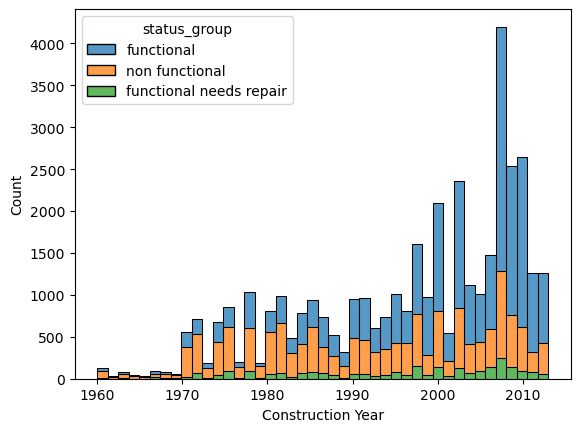

In [136]:
figure = sns.histplot(data=df[df['construction_year'] != 0], x='construction_year', hue='status_group', fill='True', multiple='stack')
plt.xlabel('Construction Year')
figure._legend.set_title('Species')

<AxesSubplot: xlabel='construction_year', ylabel='status_group'>

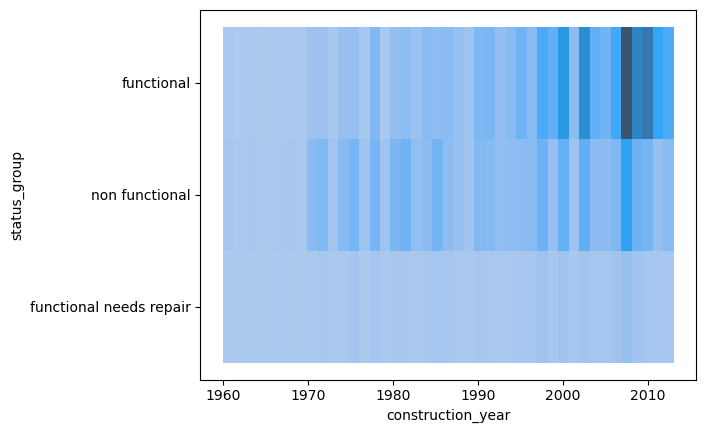

In [ ]:
sns.histplot(data=df[df['construction_year'] != 0], x='construction_year', y='status_group')